In [159]:
import soundfile as sf

# Load the audio file
data, samplerate = sf.read('Bat.ogg')

# Print the shape of the array
print("Shape of the audio array:", data.shape)

# Select only one channel (the first channel in this example)
mono_data = data[:, 0] if data.ndim > 1 else data

# Print the shape of the mono audio array
print("Shape of the mono audio array:", mono_data.shape)


Shape of the audio array: (7872, 2)
Shape of the mono audio array: (7872,)


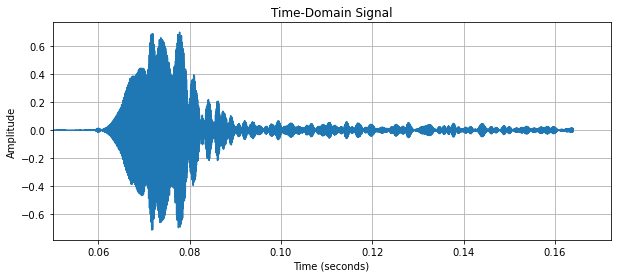

In [160]:
import matplotlib.pyplot as plt
import numpy as np

# Calculate the time for each sample
num_samples = len(mono_data)
time_array = np.arange(num_samples) / samplerate

# Plotting
plt.figure(figsize=(10, 4))
plt.plot(time_array, mono_data)
plt.xlim(0.05)  # Setting the x-axis limit
plt.title('Time-Domain Signal')  # Title of the plot
plt.xlabel('Time (seconds)')  # X-axis label
plt.ylabel('Amplitude')  # Y-axis label
plt.grid(True)

# Exporting the plot as an image file
plot_file_path = 'time_domain_signal_plot.png'
plt.savefig(plot_file_path)

# Displaying the plot in the output
plt.show()



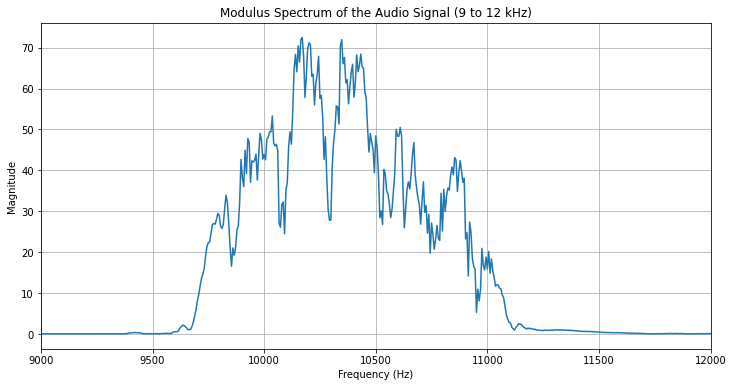

In [161]:
# Load the audio file and convert it to mono if it's stereo
data, samplerate = sf.read('Bat.ogg')
mono_data = data[:, 0] if data.ndim > 1 else data

# Compute the Fourier Transform
fft_result = np.fft.fft(mono_data)
fft_freqs = np.fft.fftfreq(len(fft_result), 1/samplerate)

# Compute the modulus (absolute value) of the Fourier Transform
fft_magnitude = np.abs(fft_result)

# Plot the modulus spectrum for the specific frequency range
plt.figure(figsize=(12, 6))
plt.plot(fft_freqs[:len(fft_result)//2], fft_magnitude[:len(fft_result)//2]) # Plot only the positive frequencies
plt.xlim(9000, 12000) # Limit the x-axis to the range 9000 to 12000 Hz
plt.title("Modulus Spectrum of the Audio Signal (9 to 12 kHz)")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.grid()

plot_file_path1 = 'modulus_spectrum.png'
plt.savefig(plot_file_path1)
plt.show()




The most prominent frequency in the bat sound is approximately 10157.68 Hz.


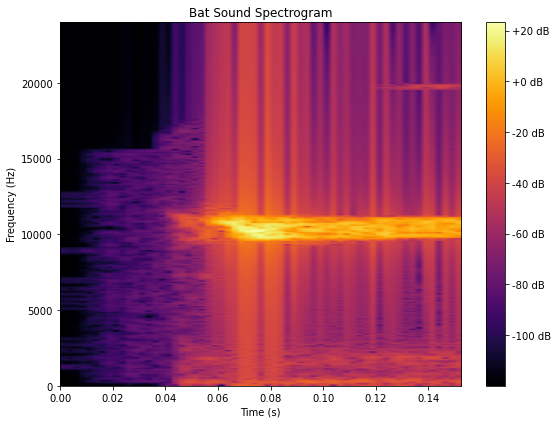

In [162]:
import numpy as np
import soundfile as sf
import matplotlib.pyplot as plt

# Function to compute the spectrogram
def compute_spectrogram(file_name, window_duration=0.01):  # window_duration in seconds
    data, samplerate = sf.read(file_name)
    if len(data.shape) > 1 and data.shape[1] == 2:
        data = data.mean(axis=1)

    window_size = int(samplerate * window_duration)  # Convert window duration to samples
    step_size = window_size // 4
    window_function = np.hamming(window_size)
    number_of_shifts = (len(data) - window_size) // step_size
    
    spectrogram_matrix = np.zeros((window_size // 2 + 1, number_of_shifts))

    for i in range(number_of_shifts):
        start = i * step_size
        end = start + window_size
        segment = data[start:end] * window_function
        fft_result = np.fft.rfft(segment)
        spectrogram_matrix[:, i] = np.abs(fft_result)

    return spectrogram_matrix, samplerate, step_size

# Compute the spectrogram for the 'Bat.ogg' file
spectrogram, sr, step_size = compute_spectrogram('Bat.ogg')

# Sum the energy across time for each frequency
frequency_energy_sum = np.sum(spectrogram, axis=1)

# Identify the most prominent frequency
most_prominent_frequency_index = np.argmax(frequency_energy_sum)
most_prominent_frequency = most_prominent_frequency_index * sr / (2 * len(frequency_energy_sum))

# Print the most prominent frequency
print(f"The most prominent frequency in the bat sound is approximately {most_prominent_frequency:.2f} Hz.")

# Plot the spectrogram with correct axes
plt.figure(figsize=(8, 6))
time_axis_length = spectrogram.shape[1] * step_size / sr  # Total duration of the time axis
frequency_axis_length = sr / 2  # Nyquist frequency, maximum frequency represented

plt.imshow(
    20 * np.log10(spectrogram + 1e-6),  # in dB
    aspect='auto',
    origin='lower',
    extent=[0, time_axis_length, 0, frequency_axis_length],
    cmap='inferno'
)

# Finalize plot
plt.colorbar(format='%+2.0f dB')
plt.title('Bat Sound Spectrogram')
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
plt.tight_layout()

plot_file_path2 = 'spectrogram.png'
plt.savefig(plot_file_path2)
plt.show()



In [163]:
import numpy as np
import soundfile as sf
import matplotlib.pyplot as plt

def check_nyquist_criterion(file_name):
    # Read audio file
    data, samplerate = sf.read(file_name)

    # If stereo, convert to mono by averaging the channels
    if len(data.shape) > 1 and data.shape[1] == 2:
        data = data.mean(axis=1)

    # Perform FFT
    fft_result = np.fft.fft(data)
    freqs = np.fft.fftfreq(len(data), 1/samplerate)

    # Find the maximum frequency component
    max_freq = np.max(np.abs(freqs[np.abs(fft_result) > 1e-6]))  # Threshold to exclude very low amplitude frequencies

    # Check against Nyquist criterion
    if max_freq * 2 > samplerate:
        print(f"Warning: The sampling rate of {samplerate} Hz may not be sufficient.")
        print(f"Maximum frequency in the signal is approximately {max_freq:.2f} Hz.")
    else:
        print(f"The sampling rate of {samplerate} Hz is sufficient.")
        print(f"Maximum frequency in the signal is approximately {max_freq:.2f} Hz.")

check_nyquist_criterion('Bat.ogg')


The sampling rate of 48000 Hz is sufficient.
Maximum frequency in the signal is approximately 24000.00 Hz.


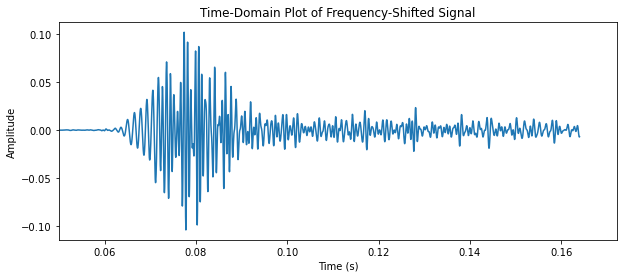

In [164]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as signal


# Convert stereo to mono if necessary
if data.shape[1] == 2:
    data = data.mean(axis=1)

# Choose a frequency for the sine wave
sine_freq = 11500  # Example frequency, adjust as needed

# Generate a sine wave
time = np.arange(len(data)) / samplerate
sine_wave = np.sin(2 * np.pi * sine_freq * time)

# Mix the original signal with the sine wave
mixed_signal = data * sine_wave

# Apply a low-pass filter
# Choose a cutoff frequency that is slightly above the expected lower frequency component
cutoff_freq = 2000  # Example cutoff, adjust as needed
filtered_signal = signal.lfilter(*signal.butter(2, cutoff_freq / (samplerate / 2)), mixed_signal)

# Plot the resulting time-domain signal
plt.figure(figsize=(10, 4))
plt.plot(time, filtered_signal)
plt.xlim(0.05)  # Setting the x-axis limit
plt.title("Time-Domain Plot of Frequency-Shifted Signal")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plot_file_path3 = 'shifted_time_domain.png'
plt.savefig(plot_file_path3)
plt.show()

# Define the output file path
output_file_path = "frequency_shifted_signal.dat"

# Export the processed signal to a .dat file
np.savetxt(output_file_path, filtered_signal)


In [183]:
import numpy as np
import pandas as pd

# Frequency ranges for each species in Hz
frequency_ranges = {
    "Little Brown Bat (Myotis lucifugus)": (20000, 100000),
    "Big Brown Bat (Eptesicus fuscus)": (20000, 60000),
    "Mexican Free-tailed Bat (Tadarida brasiliensis)": (25000, 50000),
    "Greater Horseshoe Bat (Rhinolophus ferrumequinum)": (75000, 100000),
    "Lesser Horseshoe Bat (Rhinolophus hipposideros)": (90000, 115000),
    "Soprano Pipistrelle (Pipistrellus pygmaeus)": (55000, 85000),
    "Common Pipistrelle (Pipistrellus pipistrellus)": (45000, 70000),
    "Spotted Bat (Euderma maculatum)": (15000, 40000)
}
noise_level = 0

# Generating random frequency datasets for each species
synthetic_data_with_noise = {species: np.random.uniform(low_freq, high_freq, 125) * (1 + np.random.normal(0, noise_level, 125)) for species, (low_freq, high_freq) in frequency_ranges.items()}

# Converting the synthetic datasets to pandas DataFrames
synthetic_dataframes = {species: pd.DataFrame(data, columns=['Frequency (Hz)']) for species, data in synthetic_data_with_noise.items()}


In [184]:
import pandas as pd
# Combining all dataframes into a single dataframe with an additional column for species
combined_df = pd.concat(
    [df.assign(Bat_Species=species) for species, df in synthetic_dataframes.items()],
    ignore_index=True
)

# Reordering columns for the format (bat species, frequency)
combined_df = combined_df[['Frequency (Hz)', 'Bat_Species']]

# Path for the .dat file
file_path = 'bat_species_frequencies.dat'

# Exporting the dataframe to a .dat file
combined_df.to_csv(file_path, index=False, sep='\t')


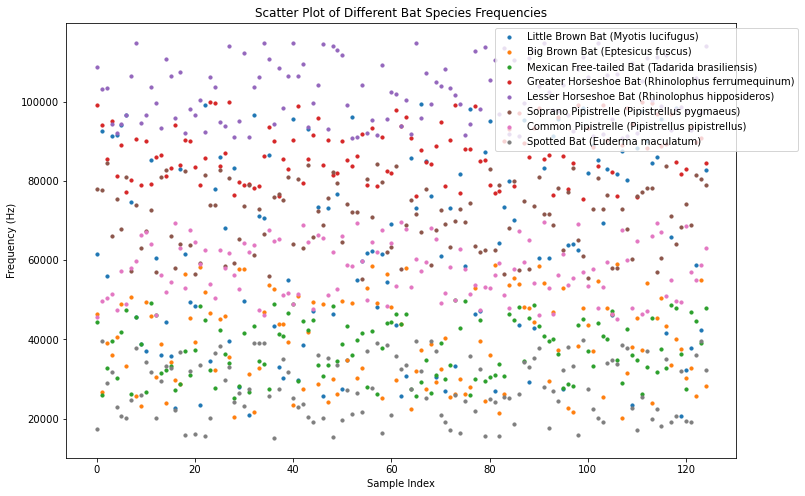

In [185]:
plt.figure(figsize=(12, 8))  # Making the plot larger

for species, df in synthetic_dataframes.items():
    plt.scatter(df.index, df['Frequency (Hz)'], label=species, s=10)  # Making scatter points smaller

plt.xlabel('Sample Index')
plt.ylabel('Frequency (Hz)')
plt.title('Scatter Plot of Different Bat Species Frequencies')
plt.legend(loc='upper right', bbox_to_anchor=(1.10, 1))  # Moving the legend upper right of the plot

plot_file_path4 = 'bat_species_freq.png'
plt.savefig(plot_file_path4)

plt.show()


In [186]:
import pandas as pd
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
# Load the dataset
data = pd.read_csv('bat_species_frequencies.dat', sep='\t')
# Randomize the order of the dataset
data = shuffle(data)
# Separate features and target variable
X = data[['Frequency (Hz)']]  # Features
y = data['Bat_Species']       # Target

# Encoding the species names to numeric values
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(data['Bat_Species'])

# Splitting the dataset (make sure X contains only numeric features)
X = data[['Frequency (Hz)']]  # Features
y = y_encoded                # Encoded Target

# Splitting the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalizing the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
# Create a SVM Classifier
model = SVC(kernel='linear')  # You can experiment with different kernels

# Train the model using the training sets
model.fit(X_train, y_train)

# Predict the response for the test dataset
y_pred = model.predict(X_test)
# Evaluating the model
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[ 4  9  0  0  0  6  0  5]
 [ 2 19  0  0  0  0  6  0]
 [ 0  0 17  2  0  0  5  0]
 [ 0  0  8 19  0  0  0  0]
 [ 2  6 10  2  0  2  2  3]
 [ 5  2  0  0  0  7  0  3]
 [ 0  6  6  0  0  0 14  0]
 [ 0  0  0  0  0 14  0 14]]
              precision    recall  f1-score   support

           0       0.31      0.17      0.22        24
           1       0.45      0.70      0.55        27
           2       0.41      0.71      0.52        24
           3       0.83      0.70      0.76        27
           4       0.00      0.00      0.00        27
           5       0.24      0.41      0.30        17
           6       0.52      0.54      0.53        26
           7       0.56      0.50      0.53        28

    accuracy                           0.47       200
   macro avg       0.42      0.47      0.43       200
weighted avg       0.43      0.47      0.43       200



/Users/hoangnguyen/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/hoangnguyen/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/hoangnguyen/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[[ 5  3  0  0  3  8  2  3]
 [ 3 15  0  0  2  3  4  0]
 [ 0  0 10  3  4  0  7  0]
 [ 0  0  4 19  4  0  0  0]
 [ 2  2  6  2  7  4  3  1]
 [ 4  2  0  0  2  6  0  3]
 [ 0  6  3  0  1  0 16  0]
 [ 6  0  0  0  3  4  0 15]]
              precision    recall  f1-score   support

           0       0.25      0.21      0.23        24
           1       0.54      0.56      0.55        27
           2       0.43      0.42      0.43        24
           3       0.79      0.70      0.75        27
           4       0.27      0.26      0.26        27
           5       0.24      0.35      0.29        17
           6       0.50      0.62      0.55        26
           7       0.68      0.54      0.60        28

    accuracy                           0.47       200
   macro avg       0.46      0.46      0.46       200
weighted avg       0.48      0.47      0.47       200



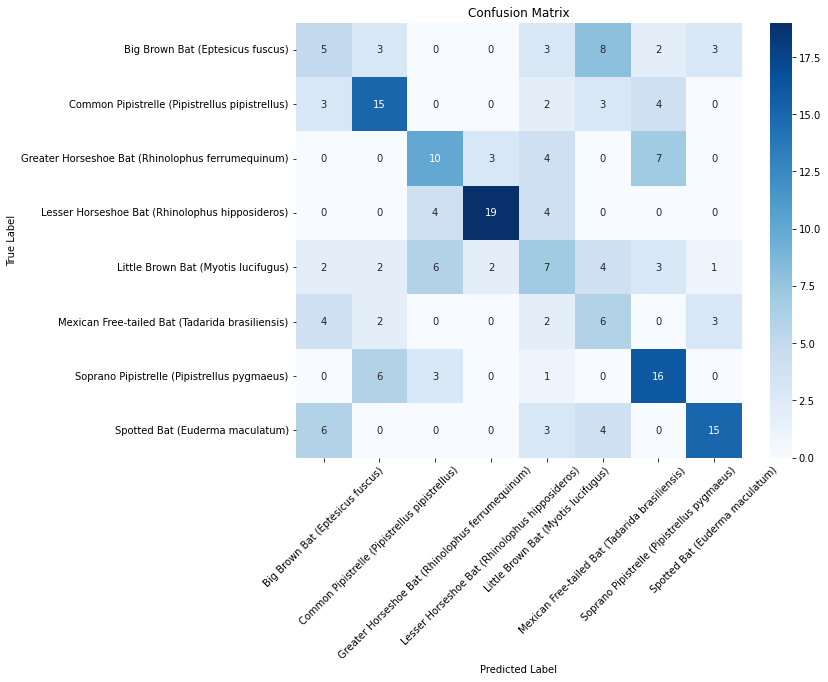

In [198]:
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns

# Create a Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=500, random_state=42)

# Train the classifier
rf_classifier.fit(X_train, y_train)

# Predict on the test set
rf_predictions = rf_classifier.predict(X_test)

# Evaluate the model
print(confusion_matrix(y_test, rf_predictions))
print(classification_report(y_test, rf_predictions))

# Compute the confusion matrix
cm = confusion_matrix(y_test, rf_predictions)

# Plotting using seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap=plt.cm.Blues, xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.xticks(rotation=45)
plt.show()


In [189]:
from sklearn.ensemble import GradientBoostingClassifier

# Create a GBM Classifier
gbm_classifier = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=42)

# Train the classifier
gbm_classifier.fit(X_train, y_train)

# Predict on the test set
gbm_predictions = gbm_classifier.predict(X_test)

# Evaluate the model
print(confusion_matrix(y_test, gbm_predictions))
print(classification_report(y_test, gbm_predictions))


[[ 2  7  0  0  0 10  2  3]
 [ 4 19  0  0  0  1  3  0]
 [ 0  0 16  3  2  0  3  0]
 [ 0  0  5 21  1  0  0  0]
 [ 2  4  7  3  3  4  3  1]
 [ 4  0  0  0  0 10  0  3]
 [ 0  9  4  0  0  0 13  0]
 [ 5  0  0  0  0 11  0 12]]
              precision    recall  f1-score   support

           0       0.12      0.08      0.10        24
           1       0.49      0.70      0.58        27
           2       0.50      0.67      0.57        24
           3       0.78      0.78      0.78        27
           4       0.50      0.11      0.18        27
           5       0.28      0.59      0.38        17
           6       0.54      0.50      0.52        26
           7       0.63      0.43      0.51        28

    accuracy                           0.48       200
   macro avg       0.48      0.48      0.45       200
weighted avg       0.49      0.48      0.46       200



In [190]:
unknown_bat_frequency = [[most_prominent_frequency]]

# Normalize this new data as well
unknown_bat_frequency_normalized = scaler.transform(unknown_bat_frequency)

# Use the trained model to make a prediction
predicted_species_code = rf_classifier.predict(unknown_bat_frequency_normalized)

# Decode the predicted species code back to the species name
predicted_species = label_encoder.inverse_transform(predicted_species_code)
print(f"The predicted species for the bat with frequency {unknown_bat_frequency[0][0]} Hz is {predicted_species[0]}.")


The predicted species for the bat with frequency 10157.676348547719 Hz is Spotted Bat (Euderma maculatum).


/Users/hoangnguyen/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [191]:
from sklearn.svm import SVC

# Create the SVM model with probability enabled
svm_classifier = SVC(probability=True)

# Train the model
svm_classifier.fit(X_train, y_train)

# Now you can use svm_classifier to predict probabilities
svm_probabilities = svm_classifier.predict_proba(unknown_bat_frequency_normalized)


unknown_bat_frequency = [[most_prominent_frequency]]

# Normalize if necessary
unknown_bat_frequency_normalized = scaler.transform(unknown_bat_frequency)

# SVM prediction (make sure your SVM model was trained with probability=True)
svm_probabilities = svm_classifier.predict_proba(unknown_bat_frequency_normalized)

# Random Forest prediction
rf_probabilities = rf_classifier.predict_proba(unknown_bat_frequency_normalized)

# GBM prediction
gbm_probabilities = gbm_classifier.predict_proba(unknown_bat_frequency_normalized)

# Convert the probabilities to percentages and map them to species names
species_names = label_encoder.classes_
svm_species_prob = dict(zip(species_names, svm_probabilities[0]))
rf_species_prob = dict(zip(species_names, rf_probabilities[0]))
gbm_species_prob = dict(zip(species_names, gbm_probabilities[0]))

# Print results
print("SVM Probabilities:", svm_species_prob)
print("Random Forest Probabilities:", rf_species_prob)
print("GBM Probabilities:", gbm_species_prob)


SVM Probabilities: {'Big Brown Bat (Eptesicus fuscus)': 0.2440113970628141, 'Common Pipistrelle (Pipistrellus pipistrellus)': 0.007605625164316141, 'Greater Horseshoe Bat (Rhinolophus ferrumequinum)': 0.01368103619428245, 'Lesser Horseshoe Bat (Rhinolophus hipposideros)': 0.00923975013566708, 'Little Brown Bat (Myotis lucifugus)': 0.16647560628467428, 'Mexican Free-tailed Bat (Tadarida brasiliensis)': 0.029395420106773498, 'Soprano Pipistrelle (Pipistrellus pygmaeus)': 0.02410861549499272, 'Spotted Bat (Euderma maculatum)': 0.5054825495564796}
Random Forest Probabilities: {'Big Brown Bat (Eptesicus fuscus)': 0.0, 'Common Pipistrelle (Pipistrellus pipistrellus)': 0.0, 'Greater Horseshoe Bat (Rhinolophus ferrumequinum)': 0.0, 'Lesser Horseshoe Bat (Rhinolophus hipposideros)': 0.0, 'Little Brown Bat (Myotis lucifugus)': 0.0, 'Mexican Free-tailed Bat (Tadarida brasiliensis)': 0.0, 'Soprano Pipistrelle (Pipistrellus pygmaeus)': 0.0, 'Spotted Bat (Euderma maculatum)': 1.0}
GBM Probabilities:

/Users/hoangnguyen/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
